In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# import datetime module
from datetime import datetime

# import apikey
from config import weather_api_key

# Import the requests library.
import requests


In [2]:
# create an empty list to hold the city weather data
city_date = []

# print the start of the loop
print('Beggining of Data Retrievel')
print('-----------------------------')

# initiate start and counter variable
record_count = 1
set_count = 1


Beggining of Data Retrievel
-----------------------------


In [3]:
# create a list of lat and long
lats = np.random.uniform(low=-90.000, high = 90.000, size=1500)
long = np.random.uniform(low=-90.000, high = 90.000, size=1500)
lat_long = zip(lats, long)
lat_long

In [4]:
# add the lat and long to a list
coordinates = list(lat_long)
# coordinates

In [5]:
# creat a list for holding cities
cities = []

# identify nearest city for each co-ordinate

for i in coordinates:
    city = citipy.nearest_city(i[0],i[1]).city_name
    
#    Check for duplicates
    if city not in cities:
        cities.append(city)
        
# print(cities)
print(len(cities) )  


601


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
range(len(cities))

range(0, 601)

In [8]:
i = 0
while i <= 1:
    city = "Houston"
    print(f"{city}")
#     city_url = url + '&q=' + city.replace("","+")
    city_url = url + '&q=' + "Houston"
    
    print(f"Processing Records {record_count} so set {set_count} | {city}")
    
    city_weather = requests.get(city_url)
    city_weather_json =  city_weather.json()
    
    print(city_weather_json)
    i += 1
    
    
    

Houston
Processing Records 1 so set 1 | Houston
{'coord': {'lon': -95.3633, 'lat': 29.7633}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.12, 'feels_like': 47.05, 'temp_min': 54.12, 'temp_max': 54.12, 'pressure': 1032, 'humidity': 46, 'sea_level': 1032, 'grnd_level': 1030}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 97}, 'clouds': {'all': 100}, 'dt': 1611890104, 'sys': {'country': 'US', 'sunrise': 1611839597, 'sunset': 1611878126}, 'timezone': -21600, 'id': 4699066, 'name': 'Houston', 'cod': 200}
Houston
Processing Records 1 so set 1 | Houston
{'coord': {'lon': -95.3633, 'lat': 29.7633}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.12, 'feels_like': 47.05, 'temp_min': 54.12, 'temp_max': 54.12, 'pressure': 1032, 'humidity': 46, 'sea_level': 1032, 'grnd_level': 1030}, 'visibility': 10000, 'wind': {'speed':

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint anthony
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | clarence town
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | lafia
Processing Record 10 of Set 1 | leh
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | moyale
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | kirishi
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | babanusah
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | valera
Processing Record 20 of Set 1 | rawson
Processing Record 21 of Set 1 | ginir
Processing Record 22 of Set 1 | pokh

Processing Record 36 of Set 4 | kaspiyskiy
Processing Record 37 of Set 4 | mahebourg
Processing Record 38 of Set 4 | raga
Processing Record 39 of Set 4 | olafsvik
Processing Record 40 of Set 4 | nalut
Processing Record 41 of Set 4 | aasiaat
Processing Record 42 of Set 4 | caravelas
Processing Record 43 of Set 4 | paamiut
Processing Record 44 of Set 4 | koslan
Processing Record 45 of Set 4 | gibara
Processing Record 46 of Set 4 | bonito
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | sao miguel do tapuio
Processing Record 49 of Set 4 | youkounkoun
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | satara
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | mortara
Processing Record 5 of Set 5 | shu
Processing Record 6 of Set 5 | bara
Processing Record 7 of Set 5 | moroni
Processing Record 8 of Set 5 | rabat
Processing Record 9 of Set 5 | kavaratti
Processing Record 10 of Set 5 | santa ro

Processing Record 27 of Set 8 | shahr-e kord
Processing Record 28 of Set 8 | toliary
City not found. Skipping...
Processing Record 29 of Set 8 | sarangarh
Processing Record 30 of Set 8 | khunzakh
Processing Record 31 of Set 8 | maceio
Processing Record 32 of Set 8 | port-cartier
Processing Record 33 of Set 8 | bandrele
Processing Record 34 of Set 8 | praia da vitoria
Processing Record 35 of Set 8 | curuguaty
Processing Record 36 of Set 8 | barreirinhas
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | costa rica
Processing Record 39 of Set 8 | paita
Processing Record 40 of Set 8 | wawa
Processing Record 41 of Set 8 | bakau
Processing Record 42 of Set 8 | atar
Processing Record 43 of Set 8 | mooi river
City not found. Skipping...
Processing Record 44 of Set 8 | las palmas
Processing Record 45 of Set 8 | cocobeach
Processing Record 46 of Set 8 | ornskoldsvik
Processing Record 47 of Set 8 | agaro
Processing Record 48 of Set 8 | dolbeau
City not found. Skipping...
Pr

Processing Record 12 of Set 12 | qandala
Processing Record 13 of Set 12 | setermoen
Processing Record 14 of Set 12 | general pico
Processing Record 15 of Set 12 | nara
Processing Record 16 of Set 12 | verkhnyaya maksakovka
Processing Record 17 of Set 12 | nola
Processing Record 18 of Set 12 | staritsa
Processing Record 19 of Set 12 | burgos
Processing Record 20 of Set 12 | asfi
Processing Record 21 of Set 12 | lethem
Processing Record 22 of Set 12 | araguatins
City not found. Skipping...
Processing Record 23 of Set 12 | mananjary
Processing Record 24 of Set 12 | mandera
Processing Record 25 of Set 12 | uglovskoye
Processing Record 26 of Set 12 | namikupa
Processing Record 27 of Set 12 | toamasina
Processing Record 28 of Set 12 | yambio
Processing Record 29 of Set 12 | bokoro
Processing Record 30 of Set 12 | mayumba
Processing Record 31 of Set 12 | torata
Processing Record 32 of Set 12 | konskie
Processing Record 33 of Set 12 | stokmarknes
Processing Record 34 of Set 12 | semibratovo
Pr

In [10]:
# convert the dictionary into panda data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.0205,-93.2180,12.16,96,96,7.90,US,2021-01-29 03:16:14
1,Saint George,37.1041,-113.5841,50.00,40,1,18.41,US,2021-01-29 03:16:50
2,Ushuaia,-54.8000,-68.3000,41.00,87,90,32.21,AR,2021-01-29 03:12:31
3,Bredasdorp,-34.5322,20.0403,59.49,81,6,5.77,ZA,2021-01-29 03:14:07
4,Clarence Town,-32.5833,151.7833,68.92,94,100,8.19,AU,2021-01-29 03:16:51
5,Victoria,22.2855,114.1577,64.00,55,1,1.99,HK,2021-01-29 03:13:19
6,Port Alfred,-33.5906,26.8910,64.00,91,0,3.00,ZA,2021-01-29 03:11:58
7,Lafia,8.4833,8.5167,71.91,20,32,1.81,NG,2021-01-29 03:16:51
8,Leh,34.1667,77.5833,1.94,67,54,1.68,IN,2021-01-29 03:16:51
9,Iqaluit,63.7506,-68.5145,-11.20,77,1,33.38,CA,2021-01-29 03:16:51


In [11]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint Anthony,US,2021-01-29 03:16:14,45.0205,-93.2180,12.16,96,96,7.90
1,Saint George,US,2021-01-29 03:16:50,37.1041,-113.5841,50.00,40,1,18.41
2,Ushuaia,AR,2021-01-29 03:12:31,-54.8000,-68.3000,41.00,87,90,32.21
3,Bredasdorp,ZA,2021-01-29 03:14:07,-34.5322,20.0403,59.49,81,6,5.77
4,Clarence Town,AU,2021-01-29 03:16:51,-32.5833,151.7833,68.92,94,100,8.19


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


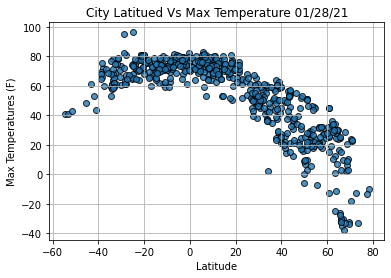

In [31]:
# import time module
import time

# Build a scattered plot
plt.scatter(lats,max_temps,edgecolor = "black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Other graph attribts
plt.title(f"City Latitued Vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperatures (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the fiure
plt.savefig("weather_data/fig1.png")

# show plot
plt.show()

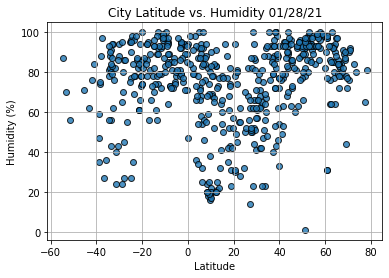

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

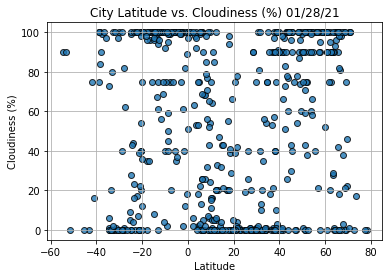

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

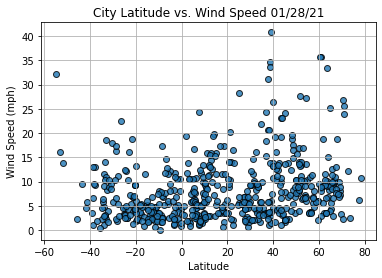

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()